# GenAI-Camp: Day 01
## Lesson: Data Preparation

This lesson is intended to show you the basics of data preparation using python.

During this lesson you will learn how to ...

- remove incomplete data
- remove html tags
- remove stop words


### Set up the environment
Import the necessary libraries, set constants, and define helper functions.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import SnowballStemmer
import os

In [ ]:
# Check runtime environment to make sure we are running in a colab environment. 
if os.getenv("COLAB_RELEASE_TAG"):
   COLAB = True
   print("Running on COLAB environment.") 
else:
   COLAB = False
   print("WARNING: Running on LOCAL environment.")

In [ ]:
# Define path of ressources
if COLAB:
    # Clone the data repository into colab
    !git clone https://github.com/openknowledge/workshop-genai-camp-data.git
    DATA_PATH = "/content/workshop-genai-camp-data/day-01/data"
else:
    DATA_PATH = "../data"
IMDB_FILE = DATA_PATH + "/imdb_dataset.csv"

In [3]:
# Load the IMDB dataset
df = pd.read_csv(IMDB_FILE)

In [4]:
# The first prepocessing step is to rename the columns
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rename columns of the dataframe to make them more readable.
    """

    df_renamed = df.copy()
    df_renamed.rename(columns={"text": "review", "label": "sentiment"}, inplace=True)

    return df_renamed

In [5]:
# Show the result
df = rename_columns(df)
df.head()

,review,sentiment,year
0,I grew up (b. 1965) watching and loving the Th...,0,2015
1,"When I put this movie in my DVD player, and sa...",0,2022
2,Why do people who do not know what a particula...,0,2015
3,Even though I have great interest in Biblical ...,0,2021
4,Im a die hard Dads Army fan and nothing will e...,1,2021


### Exercise 01: Remove punctuations
Since we want to remove all characters, which might be useless for classification, we remove punctuations. Keep in mind: We did not test if punctuations correlate to any kind of sentiment. In a real world scenario, we should analyse this first.
1. Look at `string.punctuation`.
2. Update the function below, to remove all punctuations

**Hints**:
* There are several ways to archieve this. One way ist to use `str.translate` (see [additional information](https://www.geeksforgeeks.org/python-string-translate/))

In [6]:
# TODO: Have a closer look at string.punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# TODO: Update the function to remove punctuation marks
def remove_punctuation(text: str) -> str:
    """
    Remove punctuation from the text.
    """
    # TODO: Create a translation table
    # Alternatively, we can use str.maketrans('', '', punctuation), but this is less readable
    translation_table = {ord(i): None for i in string.punctuation}
    
    return text.translate(translation_table)


In [ ]:
# TODO: Test removing punctuation
text = "Hello, world! This is a test."
print(remove_punctuation(text))

Hello world This is a test


### Exercise 02: Remove HTML-Tags
In some text datasets, like IMDB reviews, HTML tags (`<p>`, `<br>`, `<div>`, etc.) are included. These tags are irrelevant for sentiment analysis and should be removed to clean the data and improve readability. In this exercise, you will implement a function that removes HTML tags from the reviews.
1. Implement a function to remove the HTML tags

**Hints**:
* Use the library [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) from the bs4 module.

In [ ]:
# TODO: Remove HTML tags from the text argument
def remove_html_tags(text: str) -> str:
    """
    Remove HTML tags from a string.
    """
    # TODO: Use BeautifulSoup to remove HTML tags and return the cleaned text
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [10]:
# TODO: Test removing HTML tags
html_text = "This is a <b>sample</b> review with HTML tags"
print(remove_html_tags(html_text))

This is a sample review with HTML tags


### Exercise 03: Lowercasing the Reviews
In text processing, it is common to convert all characters to lowercase. This helps to avoid treating words like "Good" and "good" as different tokens. In this exercise, you will implement a function that converts all text in the reviews to lowercase.
1. Implement a function to transform text to lowercase

**Hints**:
* See `hello-python` notebook for string operations

In [ ]:
# TODO: Define a function to transform a string to lowercase
def transform_to_lowercase(text: str) -> str:
    """
    Transform a string to lowercase.
    """

    # TODO: Transform the text to lowercase and return it
    return text.lower()

In [ ]:
# TODO: Test transforming the text to lowercase
text = "This is a SAMPLE review"
print(transform_to_lowercase(text))

### Exercise 04: Remove stopwords
Stop words are common words (like "the," "is," "in," "and") that often do not contribute much meaning to the analysis of text. Removing them can help reduce the noise in the data and improve the performance of models. 
1. Implement a function to remove stop words from a text.
2. Use the nltk library
3. Use the stopwords for filtering the text

In [ ]:
# Download the stopwords from nltk
nltk.download('stopwords')

# TODO: Update the function to remove stopwords
def remove_stopwords(text: str) -> str:
    """
    Remove stopwords from a string.
    """

    # Load the english stopwords
    stop_words = set(stopwords.words('english'))

    # TODO: Split the text into words
    words = text.split()

    # TODO: Filter words that are not in the stopwords. Use i.e. a for loop.
    filtered_text = [word for word in words if word not in stop_words]
    return ' '.join(filtered_text)

[nltk_data] Downloading package stopwords to /home/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# TODO: Test the removing of stopwords. Try different capitalizations. What do you conclude?
text = "This is a sample review with some stopwords"
print(remove_stopwords(text))

# Solution: We should transform to lowercase before removing stopwords. Otherwise, we will not remove the stopwords correctly.

This sample review stopwords


### Exercise 05: Stemming
Stemming is a crucial preprocessing step in Natural Language Processing (NLP) that reduces words to their root or base form. This normalization helps to group similar words and reduces dimensionality, which can improve the performance and generalization of machine learning models. It also helps to avoid treating different forms of a word as separate entities, making text analysis more effective.
- Update the function below to stem an input string
- Use the `nltk` library
- See [documentation](https://www.nltk.org/howto/stem.html) for usage of a stemmer

**Hints**:
* The stemmer stems words (not sentences), so you need to split the text into words first

In [ ]:
# TODO: Update the function to stem the words
def stem_text(text: str) -> str:
    """
    Stem the text using a nltk stemmer.
    """

    # Initialize the stemmer
    stemmer = SnowballStemmer("english")

    # TODO: Split the text into words
    words = text.split()

    # TODO: Stem each word
    stemmed_words = [stemmer.stem(word) for word in words]

    # TODO: Join the stemmed words back into a string and return it
    return ' '.join(stemmed_words)

In [15]:
# TODO: Test the stemming function
text = "make made making makes"
print(stem_text(text))

make made make make


### (Optional) Exercise 06: Data Preparation Pipeline
In this exercise you should use all the preparation functions you implemented in the exercises above to create a preparation pipeline. Here, the pipeline is just another function, which uses the functions above. After preparing the data, visualize the word clouds (or bar plots showing the most common words) for each sentiment again. Do you see any improvements?
1. Implement a function, which receives the original dataframe as an argument and returns the preprocessed dataframe
2. Visualize Wordclouds or bar plots of most common words per sentiment

In [ ]:
def get_mostcommon_words(text_serie: pd.Series, amount_of_words: int = 10) -> list[tuple[str, int]]:
    """
    Return the most common words with their respective count
    """
    counter = Counter(' '.join(text_serie).split())
    return counter.most_common(amount_of_words)

# TODO: Your implementation of the pipeline
def preparation_pipeline(df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepares the DataFrame for modeling using the available preprocessing functions.
    """

    # TODO: Use all the functions defined above to preprocess the review column
    # Copy dataframe
    df_processed = df.copy()

    # Remove HTML tags
    df_processed['review'] = df_processed['review'].apply(remove_html_tags)

    # Remove punctuations
    df_processed['review'] = df_processed['review'].apply(remove_punctuation)
    
    # Transform to lowercase
    df_processed['review'] = df_processed['review'].apply(transform_to_lowercase)
    
    # Remove stopwords
    df_processed['review'] = df_processed['review'].apply(remove_stopwords)

    # Stem the text
    df_processed['review'] = df_processed['review'].apply(stem_text)
    
    return df_processed

In [18]:
# See the result
df_processed = preparation_pipeline(df)
df_processed.head()

,review,sentiment,year
0,grew b 1965 watch love thunderbird mate school...,0,2015
1,put movi dvd player sat coke chip expect hope ...,0,2022
2,peopl know particular time past like feel need...,0,2015
3,even though great interest biblic movi bore de...,0,2021
4,im die hard dad armi fan noth ever chang got t...,1,2021


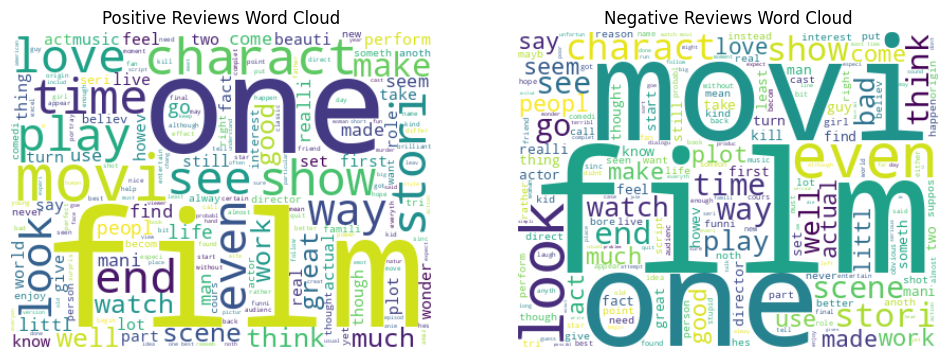

In [ ]:
# TODO: Your implementation to show the wordcloud
# Generate word clouds
positive_reviews = df_processed[df_processed["sentiment"] == 1]['review']
negative_reviews = df_processed[df_processed["sentiment"] == 0]['review']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=400, height=300, background_color='white').generate(' '.join(positive_reviews))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=400, height=300, background_color='white').generate(' '.join(negative_reviews))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()

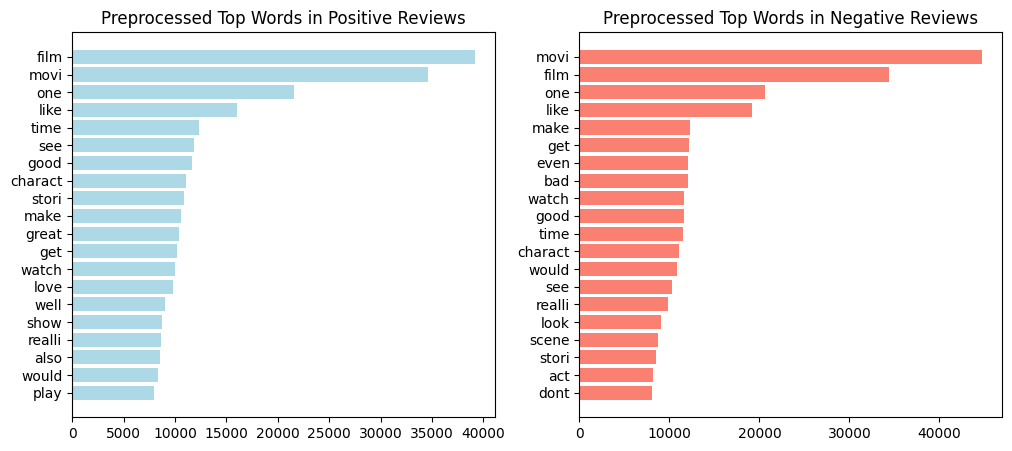

In [ ]:
# TODO: Your implementation to show the bar plot
postive_reviews_common_words = get_mostcommon_words(positive_reviews, 20)
negative_reviews_common_words = get_mostcommon_words(negative_reviews, 20)

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.barh([word for word, _ in postive_reviews_common_words], [count for _, count in postive_reviews_common_words], color='lightblue')
plt.title('Preprocessed Top Words in Positive Reviews')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh([word for word, _ in negative_reviews_common_words], [count for _, count in negative_reviews_common_words], color='salmon')
plt.title('Preprocessed Top Words in Negative Reviews')
plt.gca().invert_yaxis()

plt.show()